In [ ]:
import sys
from pathlib import Path

root = Path().resolve().parents[1]  
src_path = root / "src"
sys.path.append(str(src_path))



**a)** Using what you have learned so far in this course, create a plot illustrating the Bias-Variance trade-off. Make sure the lines and axes are labeled, with font size being the same as in the text.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt


from data import runge_function, equispaced_points, train_test_split
from basis import vandermonde
from regression import ols_svd
from validation import mse

n_points = 100
X = equispaced_points(n_points)
y_true = runge_function(X)

noise_level = 0.1
y = y_true + np.random.normal(0, noise_level, n_points)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_ratio=0.3, seed=314)

degrees = range(1, 19)
train_errors, test_errors = [], []

for d in degrees:
    Xd_train, Xd_test = vandermonde(X_train, d), vandermonde(X_test, d)
    coef, pred_fn, *_ = ols_svd(Xd_train, y_train)
    train_errors.append(mse(y_train, pred_fn(Xd_train, coef)))
    test_errors.append(mse(y_test, pred_fn(Xd_test, coef)))

plt.plot(degrees, train_errors, 'b', label='Train')
plt.plot(degrees, test_errors, 'r', label='Test')
plt.xlabel('Model Complexity (Degree)')
plt.ylabel('Prediction Performance (MSE)')
plt.yscale('log')
plt.title('Bias–Variance Tradeoff')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('bias-variance-tradeoff.pdf')
plt.show()



d) Create a heatmap showing the MSE of a Ridge regression model for various polynomial degrees and lambda values. Make sure the axes are labeled, and that the title or colorbar describes what is plotted.



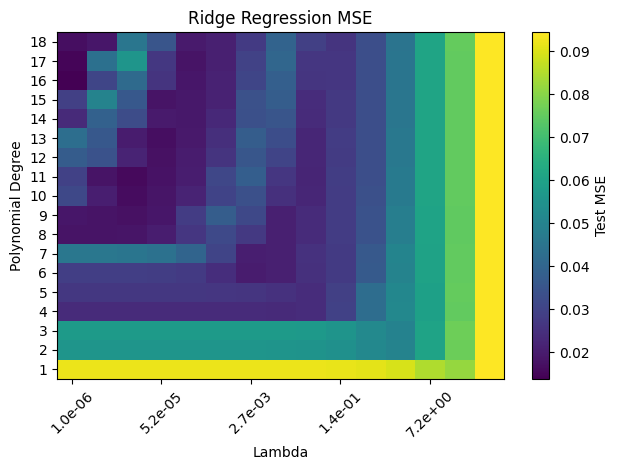

In [27]:
from regression import ridge_sklearn

X = equispaced_points(80)
y = runge_function(X) + np.random.normal(0, 0.1, len(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_ratio=0.3)

degrees = range(1, 19)
lambdas = np.logspace(-6, 2, 15)

mse_matrix = np.full((len(degrees), len(lambdas)), np.nan)

for i, d in enumerate(degrees):
    Xd_train, Xd_test = vandermonde(X_train, d), vandermonde(X_test, d)
    for j, lam in enumerate(lambdas):
        coef, pred_fn, *_ = ridge_sklearn(Xd_train, y_train, lam)
        mse_matrix[i, j] = mse(y_test, pred_fn(Xd_test, coef))


plt.imshow(mse_matrix, cmap='viridis', aspect='auto', origin='lower')
plt.colorbar(label='Test MSE')
plt.xticks(range(0, len(lambdas), 3), [f'{lam:.1e}' for lam in lambdas[::3]], rotation=45)
plt.yticks(range(len(degrees)), degrees)
plt.xlabel('Lambda')
plt.ylabel('Polynomial Degree')
plt.title('Ridge Regression MSE')
plt.tight_layout()
plt.savefig('ridge-heatmap.pdf')
plt.show()
